In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
path = 'D:\DeepLearning\Models\dataset'
os.chdir(path)

os.makedirs('valid/freshapples')
os.makedirs('valid/freshbananas')
os.makedirs('valid/freshoranges')
os.makedirs('valid/rottenapples')
os.makedirs('valid/rottenbananas')
os.makedirs('valid/rottenoranges')

os.makedirs('test/freshapples')
os.makedirs('test/freshbananas')
os.makedirs('test/freshoranges')
os.makedirs('test/rottenapples')
os.makedirs('test/rottenbananas')
os.makedirs('test/rottenoranges')




In [16]:
for c in random.sample(glob.glob('direct/freshapples/*.*'),100):
    shutil.move(c,'valid/freshapples')


In [17]:
for c in random.sample(glob.glob('direct/freshbanana/*.*'),100):
    shutil.move(c,'valid/freshbananas')
for c in random.sample(glob.glob('direct/freshoranges/*.*'),100):
    shutil.move(c,'valid/freshoranges')
for c in random.sample(glob.glob('direct/rottenapples/*.*'),100):
    shutil.move(c,'valid/rottenapples')
for c in random.sample(glob.glob('direct/rottenbanana/*.*'),100):
    shutil.move(c,'valid/rottenbanans')
for c in random.sample(glob.glob('direct/rottenoranges/*.*'),100):
    shutil.move(c,'valid/rottenoranges')
for c in random.sample(glob.glob('direct/freshapples/*.*'),75):
    shutil.move(c,'test/freshapples')
for c in random.sample(glob.glob('direct/freshbanana/*.*'),75):
    shutil.move(c,'test/freshbananas')
for c in random.sample(glob.glob('direct/freshoranges/*.*'),75):
    shutil.move(c,'test/freshoranges')
for c in random.sample(glob.glob('direct/rottenapples/*.*'),75):
    shutil.move(c,'test/rottenapples')
for c in random.sample(glob.glob('direct/rottenbanana/*.*'),75):
    shutil.move(c,'test/rottenbananas')
for c in random.sample(glob.glob('direct/rottenoranges/*.*'),75):
    shutil.move(c,'test/rottenoranges')

In [18]:
for c in random.sample(glob.glob('direct/rottenbanana/*.*'),75):
    shutil.move(c,'test/rottenbananas')

In [19]:
for c in random.sample(glob.glob('direct/rottenbanana/*.*'),100):
    shutil.move(c,'valid/rottenbananas')

In [21]:
path = 'D:\DeepLearning\Models'
os.chdir(path)

In [22]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [28]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
     .flow_from_directory(directory=train_path, target_size=(224,224), classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas', 'rottenoranges'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
     .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas', 'rottenoranges'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
     .flow_from_directory(directory=test_path, target_size=(224,224), classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas', 'rottenoranges'], batch_size=10, shuffle=False)

Found 1787 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 450 images belonging to 6 classes.


In [29]:
imgs, labels = next(train_batches)

In [30]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

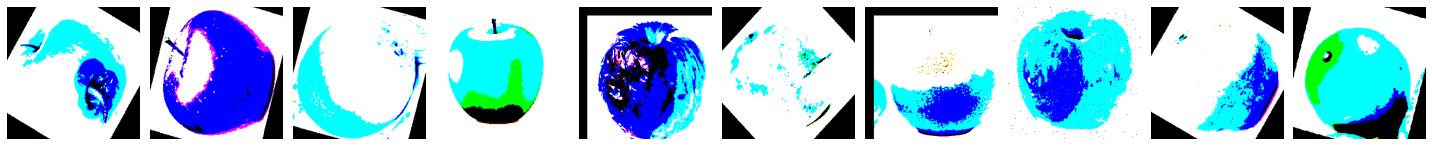

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


In [31]:
plotImages(imgs)
print(labels)

In [32]:
imgs1, labels1 = next(valid_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

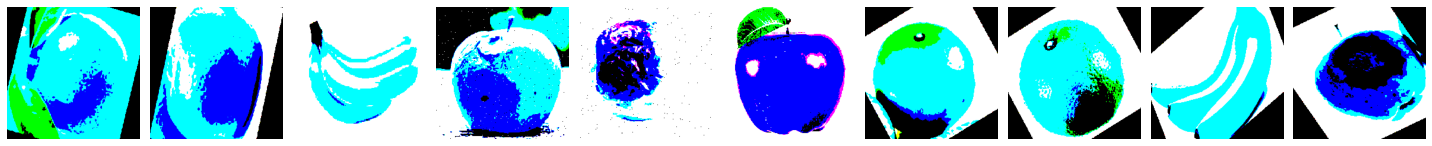

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [33]:
plotImages(imgs1)
print(labels1)

In [34]:
imgs2, labels2 = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

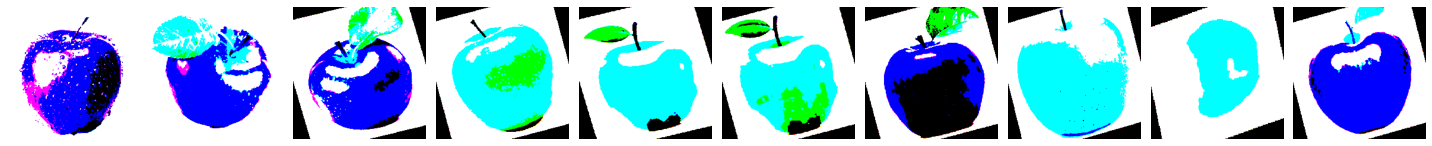

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [35]:
plotImages(imgs2)
print(labels2)

In [38]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1204230   
Total params: 1,223,622
Trainable params: 1,223,622
Non-trainable params: 0
______________________________________________

In [42]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
179/179 - 81s - loss: 0.0159 - accuracy: 0.9938 - val_loss: 12.1266 - val_accuracy: 0.5933
Epoch 2/10
179/179 - 71s - loss: 0.1081 - accuracy: 0.9787 - val_loss: 13.3195 - val_accuracy: 0.5700
Epoch 3/10
179/179 - 69s - loss: 0.2884 - accuracy: 0.9647 - val_loss: 15.1274 - val_accuracy: 0.5533
Epoch 4/10
179/179 - 71s - loss: 0.1664 - accuracy: 0.9726 - val_loss: 13.9002 - val_accuracy: 0.5867
Epoch 5/10
179/179 - 70s - loss: 0.0134 - accuracy: 0.9955 - val_loss: 13.9547 - val_accuracy: 0.5867
Epoch 6/10
179/179 - 70s - loss: 0.0087 - accuracy: 0.9955 - val_loss: 12.7178 - val_accuracy: 0.5883
Epoch 7/10
179/179 - 71s - loss: 0.0036 - accuracy: 0.9983 - val_loss: 12.3336 - val_accuracy: 0.5950
Epoch 8/10
179/179 - 71s - loss: 5.8971e-04 - accuracy: 1.0000 - val_loss: 12.6736 - val_accuracy: 0.5967
Epoch 9/10
179/179 - 71s - loss: 2.6551e-05 - accuracy: 1.0000 - val_loss: 12.7011 - val_accuracy: 0.5983
Epoch 10/10
179/179 - 71s - loss: 2.0113e-05 - accuracy: 1.0000 - val_loss

Text(0.5, 1.0, 'Training and validation loss')

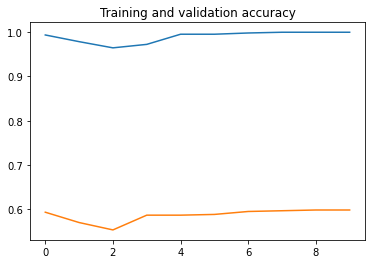

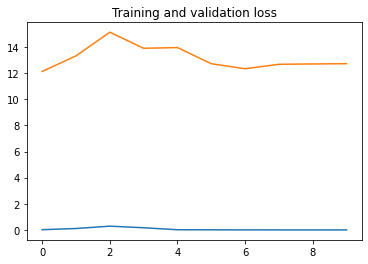

In [55]:
accuracy      = history.history[     'accuracy' ]
val_accuracy  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(accuracy))

plt.plot  ( epochs,     accuracy )
plt.plot  ( epochs, val_accuracy )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [57]:
result = model.evaluate_generator(valid_batches, 50)
print('Accuracy of this model is: ', result[1])

c:\users\mohit\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy of this model is:  0.6100000143051147


# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

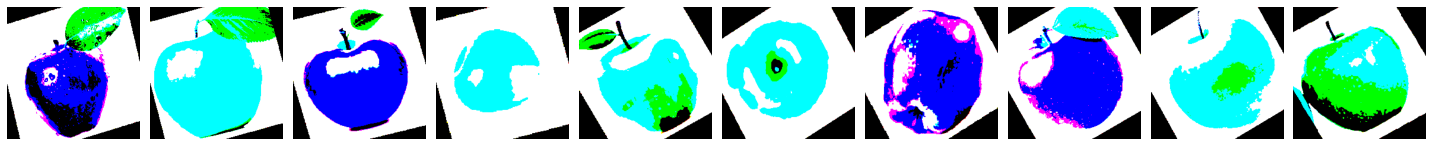

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [44]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [45]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [46]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [47]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
test_batches.class_indices

{'freshapples': 0,
 'freshbananas': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbananas': 4,
 'rottenoranges': 5}

Confusion matrix, without normalization
[[61  0  1 13  0  0]
 [ 8  0  4 56  0  7]
 [ 0  0 71  2  0  2]
 [ 0  0  7 61  0  7]
 [ 0  0  1 23  0 51]
 [ 0  0 15  4  0 56]]


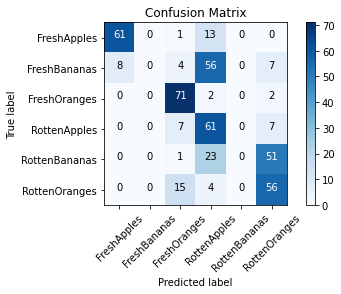

In [51]:
cm_plot_labels = ['FreshApples','FreshBananas','FreshOranges','RottenApples','RottenBananas','RottenOranges']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [59]:
model_version = "1"
model_name = "fruit-ripeness-detection-model"
model_path = os.path.join(model_name, model_version)
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: fruit-ripeness-detection-model\1\assets


In [60]:
model.save("fruit-ripeness-detection-model.h5")

In [61]:
shutil.make_archive('fruit-ripeness-detection-model', 'zip', 'fruit-ripeness-detection-model')

'D:\\DeepLearning\\Models\\fruit-ripeness-detection-model.zip'

# Build fine tuned VGG16 model

In [58]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 91s 0us/step


In [62]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [63]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [64]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [66]:
for layer in model.layers:
    layer.trainable = False

In [67]:
model.add(Dense(units=6, activation='softmax'))

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Train fine tuned VGG16 Model

In [69]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [70]:
history=model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
179/179 - 450s - loss: 0.8081 - accuracy: 0.7029 - val_loss: 2.7450 - val_accuracy: 0.5883
Epoch 2/5
179/179 - 404s - loss: 0.2637 - accuracy: 0.9161 - val_loss: 2.9368 - val_accuracy: 0.6217
Epoch 3/5
179/179 - 403s - loss: 0.1750 - accuracy: 0.9508 - val_loss: 3.0992 - val_accuracy: 0.6267
Epoch 4/5
179/179 - 473s - loss: 0.1328 - accuracy: 0.9675 - val_loss: 3.2290 - val_accuracy: 0.6317
Epoch 5/5
179/179 - 422s - loss: 0.1070 - accuracy: 0.9737 - val_loss: 3.2980 - val_accuracy: 0.6367


Text(0.5, 1.0, 'Training and validation loss_2')

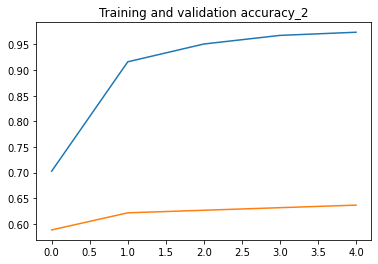

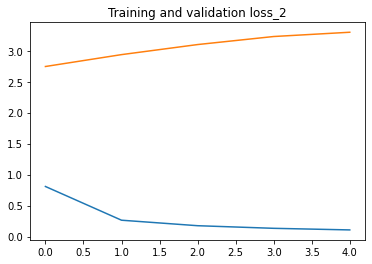

In [71]:
accuracy      = history.history[     'accuracy' ]
val_accuracy  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(accuracy))

plt.plot  ( epochs,   accuracy )
plt.plot  ( epochs, val_accuracy )
plt.title ('Training and validation accuracy_2')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss_2' )

In [72]:
result = model.evaluate_generator(valid_batches, 50)
print('Accuracy of this model is: ', result[1])

c:\users\mohit\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy of this model is:  0.6299999952316284



# Predict

In [73]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

Confusion matrix, without normalization
[[73  0  0  2  0  0]
 [10  0 19 46  0  0]
 [ 0  0 73  0  0  2]
 [ 1  0  0 71  0  3]
 [ 0  0  0 69  0  6]
 [ 0  0  5  2  0 68]]


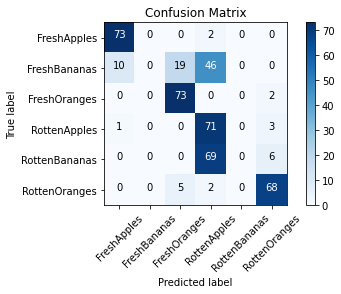

In [74]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['FreshApples','FreshBananas','FreshOranges','RottenApples','RottenBananas','RottenOranges']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')